In [18]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [19]:
def stats_test(*data):

    #shapiro
    print('All:', stats.shapiro(data))
    for i in np.arange(0, len(data)):
        _, b = stats.shapiro(data[i])
        print('p-value', b)

    #kruskal
    k = stats.kruskal(*data)
    print(k)

    # anova test
    anova = stats.f_oneway(*data)
    print(anova)

    # tukey test
    a = []
    s = []
    for d in np.arange(0, len(data)):
        a = a + data[d]
        s.append('scenario ' + str(d+1))

    df = pd.DataFrame({'score': a,
                       'group': np.repeat(s, repeats=len(data[0]))})

    tukey = pairwise_tukeyhsd(endog=df['score'],
                              groups=df['group'],
                              alpha=0.05)

    print(tukey)

    rows = tukey.summary().data[1:]
    plt.hlines( range(len(rows)), [row[4] for row in rows], [row[5] for row in rows] )
    plt.vlines( 0, -1, len( rows )-1, linestyles='dashed' )
    plt.gca().set_yticks( range( len( rows ) ) )
    plt.gca().set_yticklabels( [ f'{x[0]}-{x[1]}' for x in rows ] )
    plt.show()
    #Confidence intervals that cross the vertical, dashed line at  are those in which the means across those groups may be equal.

# Representação de Dados

## Kraemer

In [20]:
columns = ['1','2','3','4','5']

data = [
    [79.0, 57.0, 60.0, 66.9, 92.8, 62.7, 72.8, 91.0, 79.0, 83.0, 83.1],
    [89.2, 68.9, 68.0, 68.7, 96.5, 73.1, 76.8, 96.0, 81.3, 90.4, 90.5],
    [83.5, 65.4, 61.7, 64.8, 93.8, 56.0, 67.4, 84.2, 76.0, 84.5, 84.4],
    [83.5, 58.0, 59.9, 71.2, 87.4, 57.3, 63.4, 79.3, 73.3, 84.2, 84.3],
    [80.3, 56.5, 60.7, 66.7, 92.2, 67.7, 73.1, 91.3, 79.1, 82.8, 82.9],
]

df = pd.DataFrame(np.transpose(data), columns=columns)

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5')]

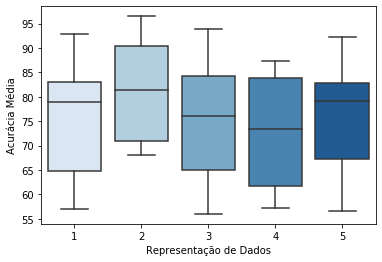

In [21]:
ax = sns.boxplot(data=data, palette='Blues')
ax.set(xlabel='Representação de Dados', ylabel='Acurácia Média')
ax.set_xticklabels(columns, rotation=0)

#fig = ax.get_figure()
#fig.savefig("boxplot_representacao_dados.pdf")

All: ShapiroResult(statistic=0.9527302980422974, pvalue=0.030398182570934296)
p-value 0.5604581236839294
p-value 0.11242392659187317
p-value 0.3462148904800415
p-value 0.11366711556911469
p-value 0.6759597063064575
KruskalResult(statistic=3.1894212729109404, pvalue=0.5266412858762131)
F_onewayResult(statistic=0.8909795993728175, pvalue=0.47629630565500547)
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
scenario 1 scenario 2   6.5545 0.6699  -7.7045 20.8136  False
scenario 1 scenario 3  -0.5091    0.9 -14.7682   13.75  False
scenario 1 scenario 4  -2.3182    0.9 -16.5773 11.9409  False
scenario 1 scenario 5   0.5455    0.9 -13.7136 14.8045  False
scenario 2 scenario 3  -7.0636 0.6137 -21.3227  7.1954  False
scenario 2 scenario 4  -8.8727 0.4089 -23.1318  5.3863  False
scenario 2 scenario 5  -6.0091   0.73 -20.2682    8.25  False
scenario 3 scenario 4

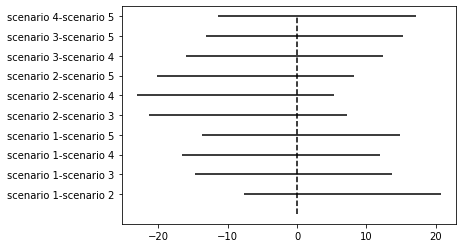

In [22]:
stats_test(data[0],data[1],data[2],data[3],data[4])

# Clusterer

# Mini Batch Kmeans

All: ShapiroResult(statistic=0.9613949060440063, pvalue=0.10170355439186096)
p-value 0.8720084428787231
p-value 0.5807164907455444
p-value 0.37104883790016174
p-value 0.7961001992225647
p-value 0.6270260214805603
KruskalResult(statistic=19.12094117647058, pvalue=0.0007440868860159262)
F_onewayResult(statistic=8.997274254262525, pvalue=1.990720424301104e-05)
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
scenario 1 scenario 2   0.0044    0.9 -0.0573  0.066  False
scenario 1 scenario 3   0.0101    0.9 -0.0516 0.0718  False
scenario 1 scenario 4   0.1105  0.001  0.0488 0.1721   True
scenario 1 scenario 5   0.0228 0.8097 -0.0389 0.0845  False
scenario 2 scenario 3   0.0057    0.9 -0.0559 0.0674  False
scenario 2 scenario 4   0.1061  0.001  0.0444 0.1678   True
scenario 2 scenario 5   0.0184    0.9 -0.0433 0.0801  False
scenario 3 scenario 4   0.1004  0.001  0

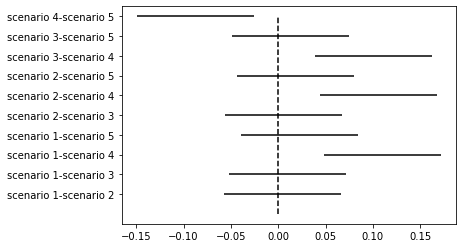

In [43]:
# SILHOUETTE SCORE
data = [
    [-0.0507458337,0.0401824935,-0.0495477311,0.000776332757,-0.0407186642,0.0196198007,-0.0752617283,0.00714909673,-0.0203453452,-0.034465068],
    [-0.04741696,0.01719381,0.02629305,-0.00828034,-0.01669726,-0.00878547,-0.03455398,-0.02726312,-0.01464865,-0.04551974],
    [0.00715837,-0.00988626,-0.01253003,0.09184286,-0.06538223,-0.00864709,0.0126575,-0.03485228,-0.08453269,0.00186777],
    [0.06826533,0.15192822,0.03443885,0.07318817,0.12676916,0.07141997,0.10155046,0.07178467,0.10645966,0.09544472],
    [-0.00432857,-0.12932438,-0.05987183,-0.03251333,-0.02949481,0.12246148,0.1194264,-0.04592493,0.0643918,0.01956006]
]
stats_test(data[0],data[1],data[2],data[3],data[4])

All: ShapiroResult(statistic=0.9790012836456299, pvalue=0.5106517672538757)
p-value 0.8640434145927429
p-value 0.3350975811481476
p-value 0.9693106412887573
p-value 0.43047019839286804
p-value 0.7878408432006836
KruskalResult(statistic=31.619635996926593, pvalue=2.2879487639371828e-06)
F_onewayResult(statistic=27.573116189418325, pvalue=1.3376323385575832e-11)
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
scenario 1 scenario 2   -2.175 0.0713 -4.4712  0.1212  False
scenario 1 scenario 3    -3.76  0.001 -6.0562 -1.4638   True
scenario 1 scenario 4    3.756  0.001  1.4598  6.0522   True
scenario 1 scenario 5   -2.842 0.0085 -5.1382 -0.5458   True
scenario 2 scenario 3   -1.585 0.3013 -3.8812  0.7112  False
scenario 2 scenario 4    5.931  0.001  3.6348  8.2272   True
scenario 2 scenario 5   -0.667    0.9 -2.9632  1.6292  False
scenario 3 scenario 4    7.

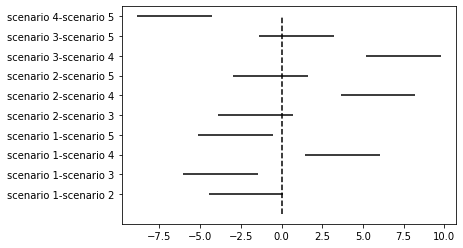

In [24]:
# HOMOGENEITY SCORE
data = [
    [86.83,	84.79,	88.13,	87.72,	83.44,	87.55,	86.81,	85.61,	88.15,	90.12],
    [86.08,	85.48,	83.19,	86.89,	82.45,	86.20,	85.84,	84.08,	84.99,	82.20],
    [83.41,	79.83,	86.91,	85.29,	83.85,	80.67,	82.21,	81.23,	84.88,	83.27],
    [89.72,	90.83,	89.05,	90.33,	92.38,	89.03,	90.48,	91.91,	89.79,	93.19],
    [84.26,	86.95,	85.61,	82.92,	81.89,	82.83,	85.15,	81.53,	84.35,	85.24]
]
stats_test(data[0],data[1],data[2],data[3],data[4])

# DBSCAN

All: ShapiroResult(statistic=0.9328935742378235, pvalue=0.007122441660612822)
p-value 0.2244313508272171
p-value 0.08296076953411102
p-value 0.17729423940181732
p-value 0.11407613009214401
p-value 0.964977502822876
KruskalResult(statistic=36.94009128032667, pvalue=1.8532246472486212e-07)
F_onewayResult(statistic=44.28803404381689, pvalue=4.732367360699375e-15)
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
scenario 1 scenario 2   0.0285 0.5206 -0.0231 0.0801  False
scenario 1 scenario 3   0.0026    0.9  -0.049 0.0542  False
scenario 1 scenario 4   0.1795  0.001  0.1279 0.2311   True
scenario 1 scenario 5   0.1476  0.001   0.096 0.1992   True
scenario 2 scenario 3  -0.0259    0.6 -0.0775 0.0257  False
scenario 2 scenario 4    0.151  0.001  0.0994 0.2026   True
scenario 2 scenario 5   0.1191  0.001  0.0675 0.1707   True
scenario 3 scenario 4   0.1769  0.001

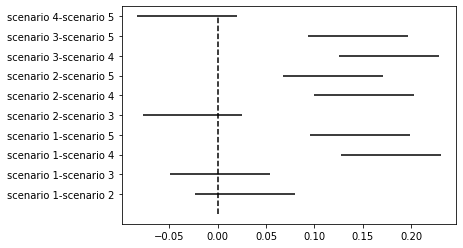

In [25]:
# SILHOUETTE SCORE
data = [
    [0.288,0.244,0.205,0.258,0.306,0.233,0.203,0.297,0.302,0.226],
    [0.284,0.236,0.274,0.297,0.248,0.302,0.294,0.302,0.297,0.313],
    [0.204,0.250,0.279,0.267,0.246,0.267,0.259,0.243,0.223,0.350],
    [0.364,0.364,0.460,0.466,0.432,0.370,0.486,0.479,0.501,0.435],
    [0.441,0.444,0.398,0.399,0.477,0.384,0.385,0.413,0.335,0.362]
]
stats_test(data[0],data[1],data[2],data[3],data[4])

All: ShapiroResult(statistic=0.6713283061981201, pvalue=2.6208926140469657e-09)
p-value 0.14689259231090546
p-value 4.1375557202627533e-07
p-value 0.22417104244232178
p-value 0.0779680609703064
p-value 0.08186100423336029
KruskalResult(statistic=40.40293481915557, pvalue=3.572564663793223e-08)
F_onewayResult(statistic=147.17533040487322, pvalue=3.128717749566317e-25)
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1     group2   meandiff p-adj   lower    upper   reject
--------------------------------------------------------------
scenario 1 scenario 2   -2.408  0.399  -6.2523   1.4363  False
scenario 1 scenario 3  -22.465  0.001 -26.3093 -18.6207   True
scenario 1 scenario 4    0.295    0.9  -3.5493   4.1393  False
scenario 1 scenario 5  -21.111  0.001 -24.9553 -17.2667   True
scenario 2 scenario 3  -20.057  0.001 -23.9013 -16.2127   True
scenario 2 scenario 4    2.703 0.2837  -1.1413   6.5473  False
scenario 2 scenario 5  -18.703  0.001 -22.5473 -14.8587   True


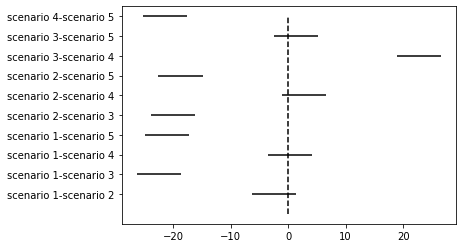

In [26]:
# HOMOGENEITY SCORE
data = [
    [90.79,90.78,90.44,90.86,89.86,90.33,90.92,90.83,90.36,90.53],
       [90.05,90.84,90.01,90.85,69.05,90.06,90.49,90.44,89.63,90.20],
       [67.73,68.14,68.47,67.93,68.39,67.95,68.44,67.97,67.98,68.05],
       [90.84,90.92,91.61,90.62,90.93,90.79,89.94,90.98,91.01,91.01],
       [69.03,69.18,70.07,70.19,69.32,69.37,69.22,69.80,69.04,69.37],
]
stats_test(data[0],data[1],data[2],data[3],data[4])

# Agglomerative Clustering

All: ShapiroResult(statistic=0.9692781567573547, pvalue=0.21628788113594055)
p-value 0.9756230115890503
p-value 0.5964230298995972
p-value 0.01696413941681385
p-value 0.11784370988607407
p-value 0.21960708498954773
KruskalResult(statistic=21.852377514678974, pvalue=0.0002144461201237848)
F_onewayResult(statistic=10.933514978838774, pvalue=2.803218579067779e-06)
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
scenario 1 scenario 2   0.0215  0.001  0.0101 0.0329   True
scenario 1 scenario 3   0.0109 0.0668 -0.0005 0.0223  False
scenario 1 scenario 4   0.0188  0.001  0.0074 0.0302   True
scenario 1 scenario 5   0.0223  0.001  0.0109 0.0337   True
scenario 2 scenario 3  -0.0106 0.0793  -0.022 0.0008  False
scenario 2 scenario 4  -0.0027    0.9 -0.0141 0.0087  False
scenario 2 scenario 5   0.0008    0.9 -0.0106 0.0122  False
scenario 3 scenario 4   0.0079 0.296

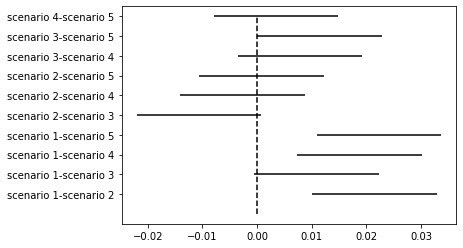

In [27]:
# SILHOUETTE SCORE
data = [
    [0.309,0.338,0.316,0.325,0.329,0.317,0.329,0.320,0.323,0.330],
    [0.337,0.353,0.338,0.352,0.350,0.334,0.341,0.361,0.342,0.343],
    [0.335,0.339,0.341,0.337,0.345,0.338,0.337,0.319,0.335,0.319],
    [0.338,0.333,0.336,0.353,0.353,0.349,0.328,0.352,0.348,0.334],
    [0.328,0.342,0.335,0.351,0.353,0.351,0.350,0.338,0.354,0.357],
]
stats_test(data[0],data[1],data[2],data[3],data[4])

All: ShapiroResult(statistic=0.8621587753295898, pvalue=3.357790774316527e-05)
p-value 0.8073431849479675
p-value 0.03923898562788963
p-value 0.5457589030265808
p-value 0.2245909571647644
p-value 0.20890803635120392
KruskalResult(statistic=44.03878531616375, pvalue=6.297861923550588e-09)
F_onewayResult(statistic=150.17463779135772, pvalue=2.0544125473332265e-25)
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
scenario 1 scenario 2    0.018    0.9 -0.3042  0.3402  False
scenario 1 scenario 3   -1.948  0.001 -2.2702 -1.6258   True
scenario 1 scenario 4    0.374 0.0156  0.0518  0.6962   True
scenario 1 scenario 5   -1.205  0.001 -1.5272 -0.8828   True
scenario 2 scenario 3   -1.966  0.001 -2.2882 -1.6438   True
scenario 2 scenario 4    0.356 0.0237  0.0338  0.6782   True
scenario 2 scenario 5   -1.223  0.001 -1.5452 -0.9008   True
scenario 3 scenario 4    

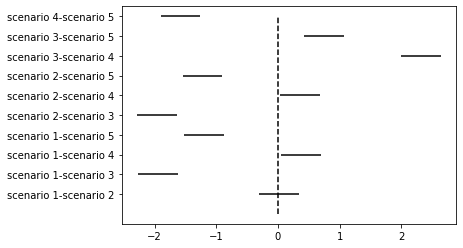

In [28]:
# HOMOGENEITY SCORE
data = [
    [99.45,99.41,99.31,99.23,99.32,99.46,99.56,99.49,99.34,99.48],
       [99.28,99.60,99.71,99.32,99.32,99.42,99.38,99.30,99.27,99.63],
       [97.38,97.63,98.11,98.17,97.22,97.38,97.03,97.45,96.75,97.45],
       [99.85,99.79,99.85,99.73,99.68,99.71,99.83,99.79,99.73,99.83],
       [97.53,98.46,98.22,98.17,98.23,98.31,98.22,98.35,97.90,98.61],
]
stats_test(data[0],data[1],data[2],data[3],data[4])

# Kmeans

All: ShapiroResult(statistic=0.9798312783241272, pvalue=0.5448684096336365)
p-value 0.765468180179596
p-value 0.5011464953422546
p-value 0.6773211359977722
p-value 0.8307381272315979
p-value 0.5455137491226196
KruskalResult(statistic=32.49564234524555, pvalue=1.5149390573911342e-06)
F_onewayResult(statistic=25.937496031997956, pvalue=3.463715935694711e-11)
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
scenario 1 scenario 2   0.0205  0.001   0.013   0.028   True
scenario 1 scenario 3   0.0125  0.001   0.005    0.02   True
scenario 1 scenario 4   0.0184  0.001  0.0109  0.0259   True
scenario 1 scenario 5   0.0245  0.001   0.017   0.032   True
scenario 2 scenario 3   -0.008 0.0319 -0.0155 -0.0005   True
scenario 2 scenario 4  -0.0021    0.9 -0.0096  0.0054  False
scenario 2 scenario 5    0.004 0.5532 -0.0035  0.0115  False
scenario 3 scenario 4   0.0059 

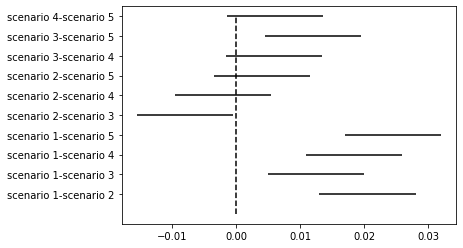

In [29]:
# SILHOUETTE SCORE
data = [
    [0.347,0.343,0.347,0.351,0.347,0.352,0.336,0.341,0.342,0.340],
    [0.364,0.361,0.364,0.366,0.370,0.359,0.375,0.369,0.359,0.364],
    [0.357,0.362,0.358,0.366,0.353,0.354,0.362,0.354,0.355,0.350],
    [0.357,0.350,0.380,0.365,0.363,0.355,0.367,0.362,0.369,0.362],
    [0.363,0.376,0.371,0.365,0.372,0.366,0.375,0.368,0.360,0.375]
]
stats_test(data[0],data[1],data[2],data[3],data[4])

All: ShapiroResult(statistic=0.871063768863678, pvalue=6.059234874555841e-05)
p-value 0.31680265069007874
p-value 0.6327707767486572
p-value 0.6250264048576355
p-value 0.2705738842487335
p-value 0.6629086136817932
KruskalResult(statistic=44.61170141223936, pvalue=4.788032440957077e-09)
F_onewayResult(statistic=167.79439501414583, pvalue=2.0111163935475661e-26)
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
scenario 1 scenario 2    0.133 0.8131 -0.2293  0.4953  False
scenario 1 scenario 3   -2.308  0.001 -2.6703 -1.9457   True
scenario 1 scenario 4    0.531 0.0013  0.1687  0.8933   True
scenario 1 scenario 5   -1.206  0.001 -1.5683 -0.8437   True
scenario 2 scenario 3   -2.441  0.001 -2.8033 -2.0787   True
scenario 2 scenario 4    0.398 0.0249  0.0357  0.7603   True
scenario 2 scenario 5   -1.339  0.001 -1.7013 -0.9767   True
scenario 3 scenario 4    2.

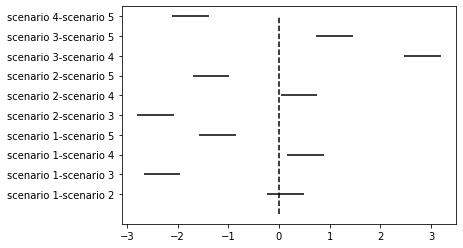

In [30]:
# HOMOGENEITY SCORE
data = [
    [99.61,99.21,99.39,99.28,99.44,99.48,98.83,99.53,98.73,99.11],
       [99.48,99.25,99.21,99.34,99.44,99.59,99.64,99.29,99.31,99.39],
       [96.68,96.58,97.34,96.61,97.47,96.95,96.87,96.29,96.88,97.86],
       [99.85,99.80,99.77,99.77,99.83,99.85,99.71,99.83,99.62,99.89],
       [98.44,98.11,98.42,98.16,97.58,98.03,97.90,98.14,97.88,97.89],
]
stats_test(data[0],data[1],data[2],data[3],data[4])

All: ShapiroResult(statistic=0.8093217611312866, pvalue=6.629432534210238e-15)
p-value 0.5106517672538757
p-value 2.6208926140469657e-09
p-value 3.357790774316527e-05
p-value 6.059234874555841e-05
KruskalResult(statistic=149.4280462841011, pvalue=3.5006275016961335e-32)
F_onewayResult(statistic=121.39861723884265, pvalue=1.8246663538521444e-44)
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj  lower   upper  reject
-----------------------------------------------------------
scenario 1 scenario 2  -4.4786 0.001 -7.4415 -1.5157   True
scenario 1 scenario 3   12.942 0.001  9.9791 15.9049   True
scenario 1 scenario 4  12.7802 0.001  9.8173 15.7431   True
scenario 2 scenario 3  17.4206 0.001 14.4577 20.3835   True
scenario 2 scenario 4  17.2588 0.001 14.2959 20.2217   True
scenario 3 scenario 4  -0.1618   0.9 -3.1247  2.8011  False
-----------------------------------------------------------


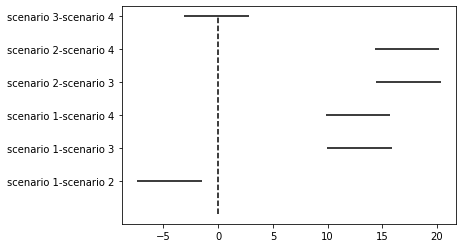

In [31]:
data = [
[86.83,84.79,88.13,87.72,83.44,87.55,86.81,85.61,88.15,90.12,86.08,85.48,83.19,86.89,82.45,86.20,85.84,84.08,84.99,82.20,83.41,79.83,86.91,85.29,83.85,80.67,82.21,81.23,84.88,83.27,89.72,90.83,89.05,90.33,92.38,89.03,90.48,91.91,89.79,93.19,84.26,86.95,85.61,82.92,81.89,82.83,85.15,81.53,84.35,85.24],
[90.79,90.78,90.44,90.86,89.86,90.33,90.92,90.83,90.36,90.53,90.05,90.84,90.01,90.85,69.05,90.06,90.49,90.44,89.63,90.20,67.73,68.14,68.47,67.93,68.39,67.95,68.44,67.97,67.98,68.05,90.84,90.92,91.61,90.62,90.93,90.79,89.94,90.98,91.01,91.01,69.03,69.18,70.07,70.19,69.32,69.37,69.22,69.80,69.04,69.37],
[99.45,99.41,99.31,99.23,99.32,99.46,99.56,99.49,99.34,99.48,99.28,99.60,99.71,99.32,99.32,99.42,99.38,99.30,99.27,99.63,97.38,97.63,98.11,98.17,97.22,97.38,97.03,97.45,96.75,97.45,99.85,99.79,99.85,99.73,99.68,99.71,99.83,99.79,99.73,99.83,97.53,98.46,98.22,98.17,98.23,98.31,98.22,98.35,97.90,98.61],
[99.61,99.21,99.39,99.28,99.44,99.48,98.83,99.53,98.73,99.11,99.48,99.25,99.21,99.34,99.44,99.59,99.64,99.29,99.31,99.39,96.68,96.58,97.34,96.61,97.47,96.95,96.87,96.29,96.88,97.86,99.85,99.80,99.77,99.77,99.83,99.85,99.71,99.83,99.62,99.89,98.44,98.11,98.42,98.16,97.58,98.03,97.90,98.14,97.88,97.89]
]

stats_test(data[0], data[1], data[2], data[3])